##**50 Startup Problem**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [13]:
start=pd.read_csv('50_Startups.csv')
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
#remove coloumn
start=start.drop('State',axis=1)
start.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [15]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [16]:
#check missing values
start.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [17]:
#change coloumn names
start=start.rename({'R&D Spend':'RnD','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)
start.head()

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


preparing a model

In [19]:
#build model with allvariables
model=smf.ols('Profit~RnD+Admin+Marketing',data=start).fit()

In [20]:
#coeficients, B0 and B values
model.params

Intercept    50122.192990
RnD              0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [21]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
RnD          17.846374
Admin        -0.525507
Marketing     1.655077
dtype: float64 
 Intercept    1.057379e-09
RnD          2.634968e-22
Admin        6.017551e-01
Marketing    1.047168e-01
dtype: float64


In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

check with each variables and then with both

In [23]:
mod_ad=smf.ols('Profit~Admin',data=start).fit()
print(mod_ad.tvalues,'\n',mod_ad.pvalues)

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [24]:
mod_mar=smf.ols('Profit~Marketing',data=start).fit()
print(mod_mar.tvalues,'\n',mod_mar.pvalues)

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [25]:
mod_admar=smf.ols('Profit~Admin+Marketing',data=start).fit()
print(mod_admar.tvalues,'\n',mod_admar.pvalues)

Intercept    1.142741
Admin        2.467779
Marketing    8.281039
dtype: float64 
 Intercept    2.589341e-01
Admin        1.729198e-02
Marketing    9.727245e-11
dtype: float64


correlation matrix

In [26]:
start.corr()

,RnD,Admin,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


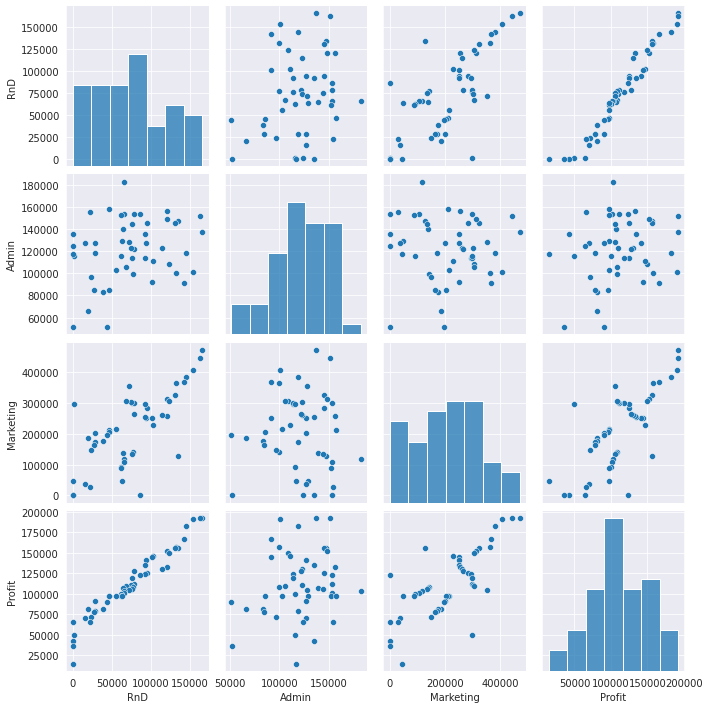

In [28]:
sns.set_style(style='darkgrid')
sns.pairplot(start)

calculating VIF

In [29]:
rsq_rnd=smf.ols('RnD~Admin+Marketing',data=start).fit().rsquared
vif_rnd=1/(1-rsq_rnd)

rsq_ad=smf.ols('Admin~RnD+Marketing',data=start).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_mar=smf.ols('Marketing~RnD+Admin',data=start).fit().rsquared
vif_mar=1/(1-rsq_mar)

#storing vif values in a data frame
d1={'variables':['RnD','Admin','Marketing'],'VIF':[vif_rnd,vif_ad,vif_mar]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,RnD,2.468903
1,Admin,1.175091
2,Marketing,2.326773


subset selection

AIC

In [30]:
#build model with Admin
model=smf.ols('Profit~RnD+Admin',data=start).fit()
f'AIC:{model.aic},rsq_ad:{rsq_ad}'

'AIC:1059.6636934567293,rsq_ad:0.1490020823951752'

In [31]:
#build model with Marketing
model=smf.ols('Profit~RnD+Marketing',data=start).fit()
f'AIC:{model.aic},rsq_mar:{rsq_mar}'

'AIC:1057.070772191826,rsq_mar:0.5702202685282504'

In [ ]:
# marketing is selected because AIC is smaller and r squr is greater

Residual Analysis

test for normality of residuals(Q-Q plot)

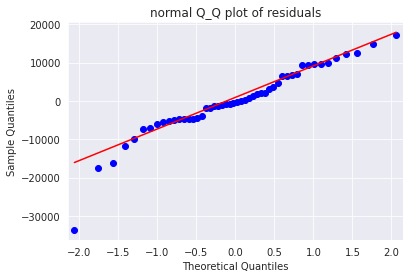

In [35]:
import statsmodels.api as sm

model=smf.ols('Profit~RnD+Marketing',data=start).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title('normal Q_Q plot of residuals')
plt.show()

In [46]:
list(np.where(model.resid>10))

[array([ 1,  2,  3, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36, 37,
        38, 40, 41, 42, 43, 45])]

Residual plot for homoscedasticity

In [47]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

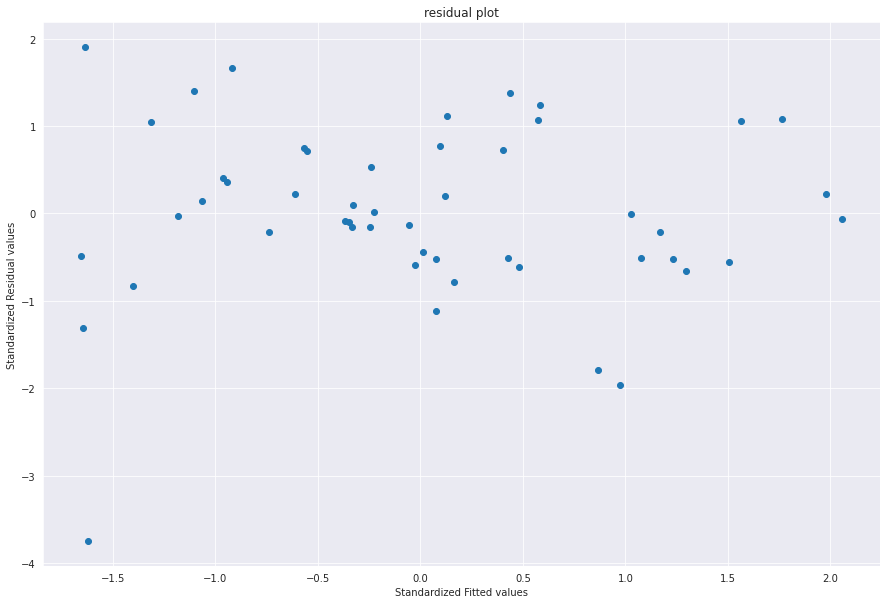

In [48]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')
plt.show()
#if there is no pattern in the graph then no problem

residual vs regressors

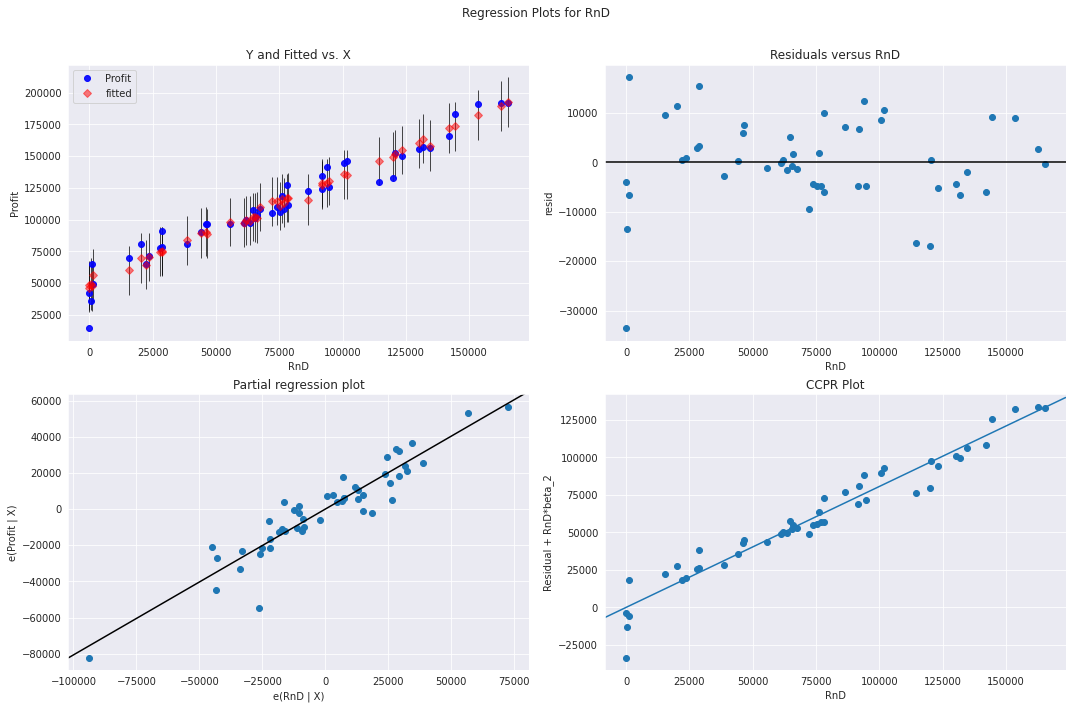

In [51]:
model=smf.ols('Profit~Admin+RnD+Marketing',data=start).fit()
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'RnD',fig=fig)

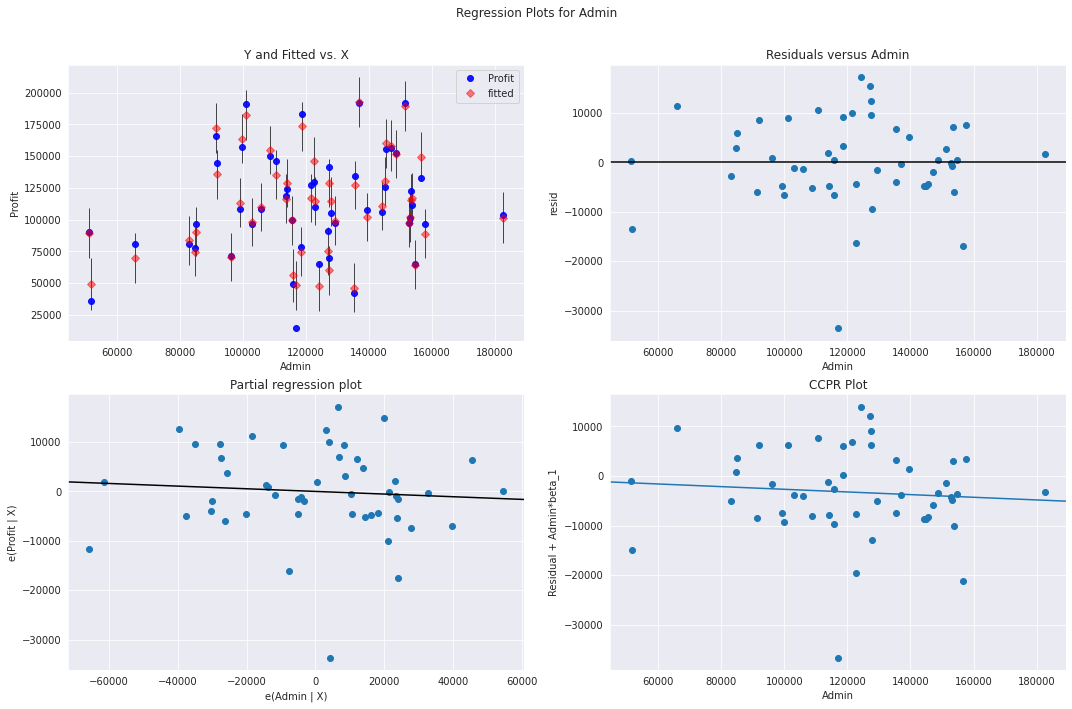

In [52]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Admin',fig=fig)

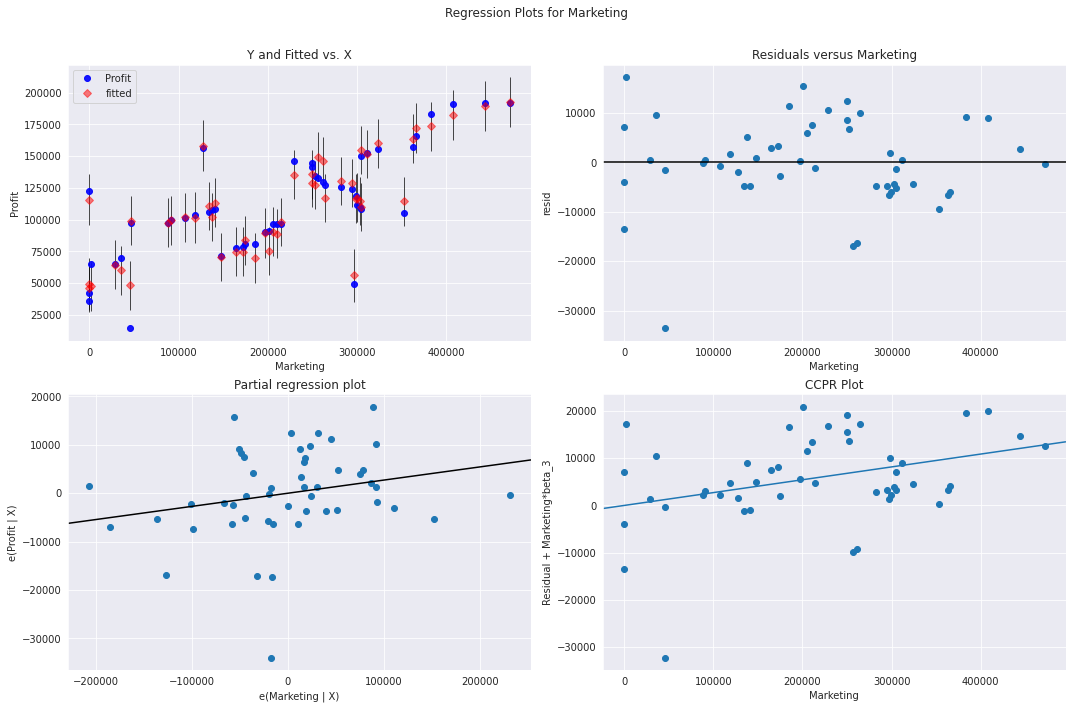

In [53]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Marketing',fig=fig)

Model Delection Diagnostics

detecting influencers/outliers

cook's distance

In [55]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<ipython-input-57-8323d4564bf8>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(start)),np.round(c,3))


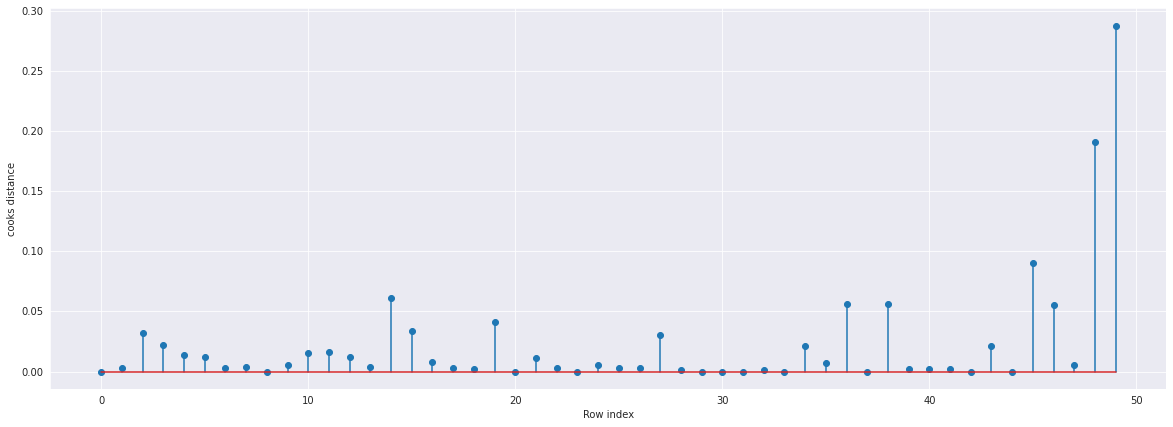

In [57]:
#plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [58]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432656)

high influence points

In [59]:
start.shape

(50, 4)

In [60]:
k=start.shape[1]
n=start.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.30000000000000004

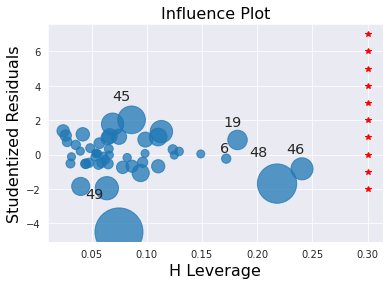

In [61]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model,alpha=0.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r*')

improving the model

In [64]:
#load the data
start.head()

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


build model

In [140]:
# excluding Admin and generate R square and AIC values
final_mar=smf.ols('Profit~RnD+Marketing',data=start).fit()

In [141]:
(final_mar.rsquared,final_mar.aic,final_mar.bic)

(0.9504503015559763, 1057.070772191826, 1062.8068412081107)

In [142]:
# excluding Marketing and generate R square and AIC values
final_ad=smf.ols('Profit~RnD+Admin',data=start).fit()

In [143]:
(final_ad.rsquared,final_ad.aic,final_ad.bic)

(0.9478129385009173, 1059.6636934567293, 1065.3997624730139)

comparing the R square values and AIC values Marketing is better than Admin

cook's distance

In [144]:
model_influence_mar=final_mar.get_influence()
(c_m,_)=model_influence_mar.cooks_distance

<ipython-input-145-134e9ac93a02>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(start)),np.round(c_m,3))


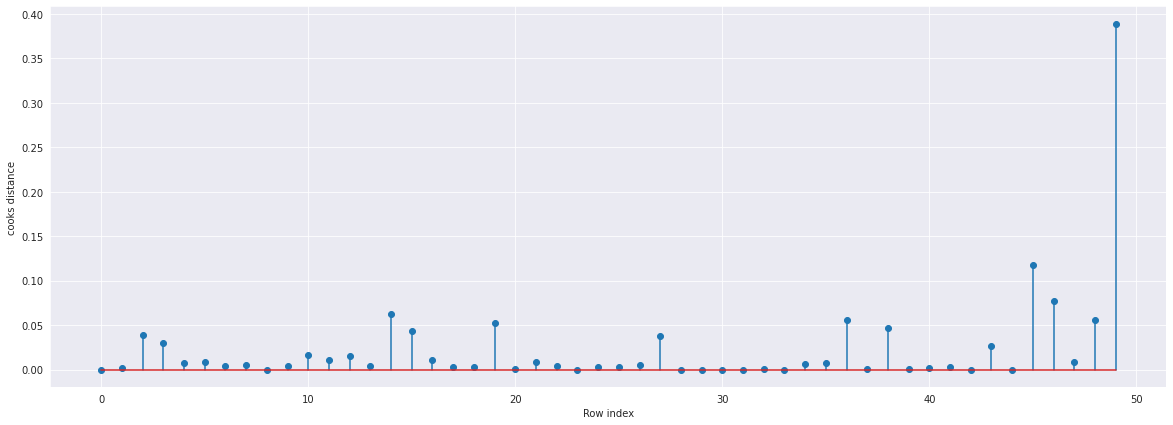

In [145]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start)),np.round(c_m,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [146]:
(np.argmax(c_m),np.max(c_m))

(49, 0.3894886227924922)

In [147]:
#drop 49 observation
start1=start.drop(start.index[49],axis=0)
start1

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [148]:
#build the model on the new data
final_mar1=smf.ols('Profit~RnD+Marketing',data=start1).fit()

In [149]:
# check again for influencers
model_influence_mar=final_mar1.get_influence()
(c_m,_)=model_influence_mar.cooks_distance

<ipython-input-150-62f7122724c7>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(start1)),np.round(c_m,3))


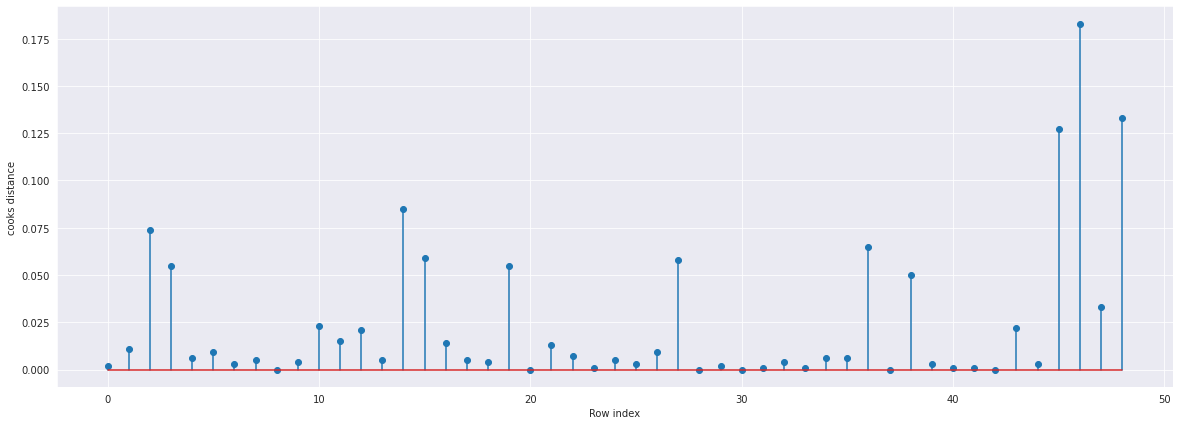

In [150]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start1)),np.round(c_m,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [151]:
(np.argmax(c_m),np.max(c_m))

(46, 0.18337556491338694)

In [152]:
#drop 45,46 and 48 observations
start2=start1.drop(start1.index[[45,46,48]],axis=0)
start2

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [153]:
#reset the index and re arrange the row values
start2=start2.reset_index()
start2.head()

,index,RnD,Admin,Marketing,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94


In [154]:
start2=start2.drop(['index'],axis=1)
start2

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [155]:
#build the model on the new data
final_mar2=smf.ols('Profit~RnD+Marketing',data=start2).fit()

In [156]:
# check again for influencers
model_influence_mar=final_mar2.get_influence()
(c_m,_)=model_influence_mar.cooks_distance

<ipython-input-157-ed6d5118e169>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(start2)),np.round(c_m,3))


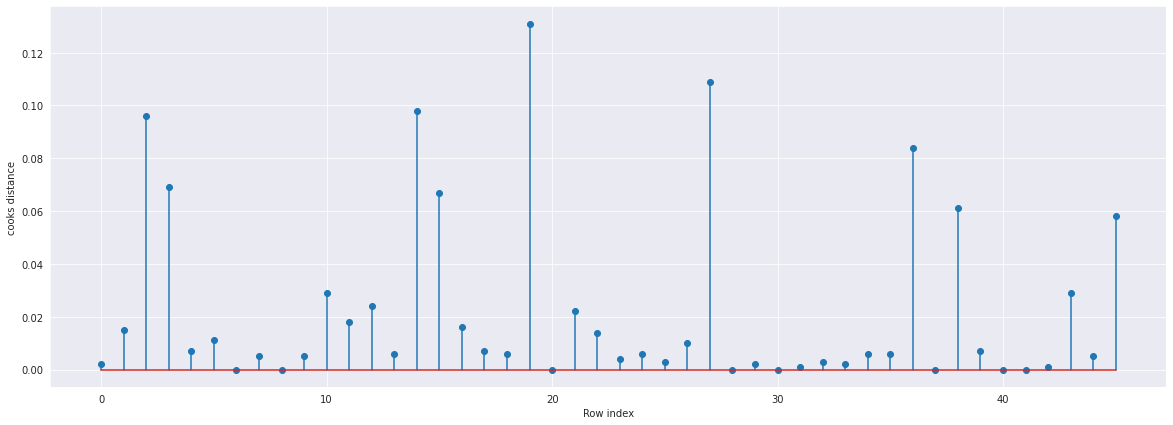

In [157]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start2)),np.round(c_m,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [158]:
(np.argmax(c_m),np.max(c_m))

(19, 0.13115264468345747)

In [159]:
#drop 19 and 27 observations
start3=start2.drop(start2.index[[19,27]],axis=0)
start3

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [160]:
#reset the index and re arrange the row values
start3=start3.reset_index()

In [161]:
start3=start3.drop(['index'],axis=1)
start3

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [162]:
#build the model on the new data
final_mar3=smf.ols('Profit~RnD+Marketing',data=start3).fit()

In [163]:
# check again for influencers
model_influence_mar=final_mar3.get_influence()
(c_m,_)=model_influence_mar.cooks_distance

<ipython-input-164-5cab718662eb>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(start3)),np.round(c_m,3))


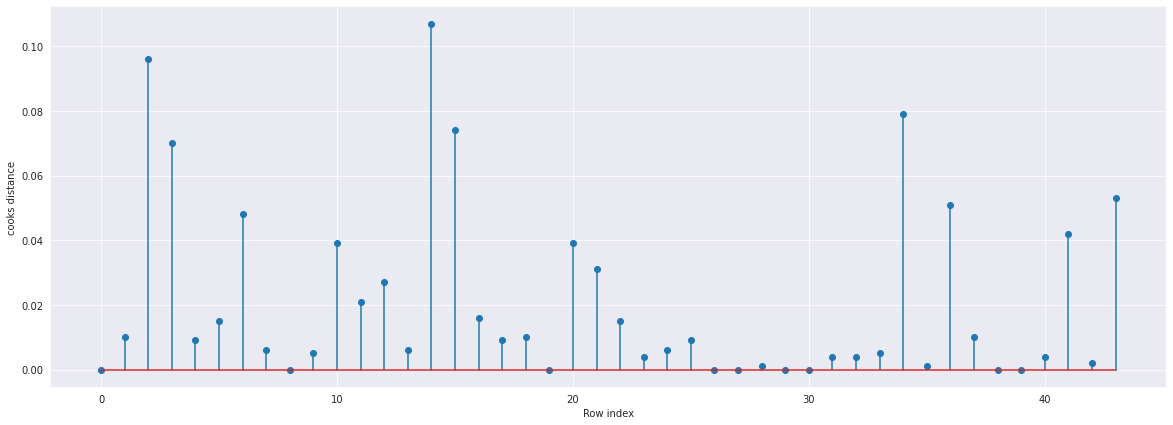

In [164]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start3)),np.round(c_m,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [165]:
(np.argmax(c_m),np.max(c_m))

(14, 0.10730803791817718)

In [166]:
#drop 14 observation
start4=start3.drop(start3.index[14],axis=0)
start4

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [167]:
#reset the index and re arrange the row values
start4=start4.reset_index()

In [168]:
start4=start4.drop(['index'],axis=1)
start4

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [169]:
#build the model on the new data
final_mar4=smf.ols('Profit~RnD+Marketing',data=start4).fit()

In [170]:
# check again for influencers
model_influence_mar=final_mar4.get_influence()
(c_m,_)=model_influence_mar.cooks_distance

<ipython-input-171-cfa37611b225>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(start4)),np.round(c_m,3))


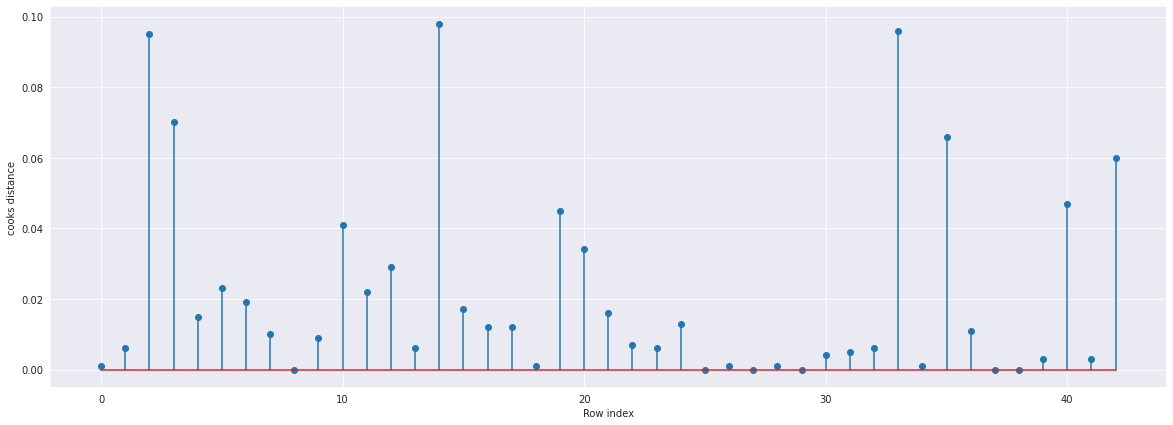

In [171]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start4)),np.round(c_m,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [172]:
(np.argmax(c_m),np.max(c_m))

(14, 0.09803914959244493)

In [173]:
#check accuracy of the model
final_mar4=smf.ols('Profit~RnD+Marketing',data=start4).fit()

In [174]:
(final_mar4.rsquared,final_mar4.aic)

(0.9702709574748796, 879.3382555243315)

creating a table for r square values

In [175]:
table={'Model':['final_mar','final_mar1','final_mar2','final_mar3','final_mar4'],'R square':[final_mar.rsquared,final_mar1.rsquared,final_mar2.rsquared,final_mar3.rsquared,final_mar4.rsquared]}
table=pd.DataFrame(table)
table

,Model,R square
0,final_mar,0.950450
1,final_mar1,0.961086
2,final_mar2,0.961192
3,final_mar3,0.965611
4,final_mar4,0.970271


##**Toyota Corolla Problem**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [3]:
tyt=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
tyt.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
#remove columns
tyt1=tyt[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
tyt1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
tyt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
#check missing values
tyt1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

preparing a model

In [15]:
#build model with allvariables
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tyt1).fit()

In [16]:
#coeficients, B0 and B values
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [17]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

check with each variables and then with both

In [19]:
mod_cc=smf.ols('Price~cc',data=tyt1).fit()
print(mod_cc.tvalues,'\n',mod_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [20]:
mod_dr=smf.ols('Price~Doors',data=tyt1).fit()
print(mod_dr.tvalues,'\n',mod_dr.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [21]:
mod_ccdr=smf.ols('Price~cc+Doors',data=tyt1).fit()
print(mod_ccdr.tvalues,'\n',mod_ccdr.pvalues)

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


correlation matrix

In [22]:
tyt1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


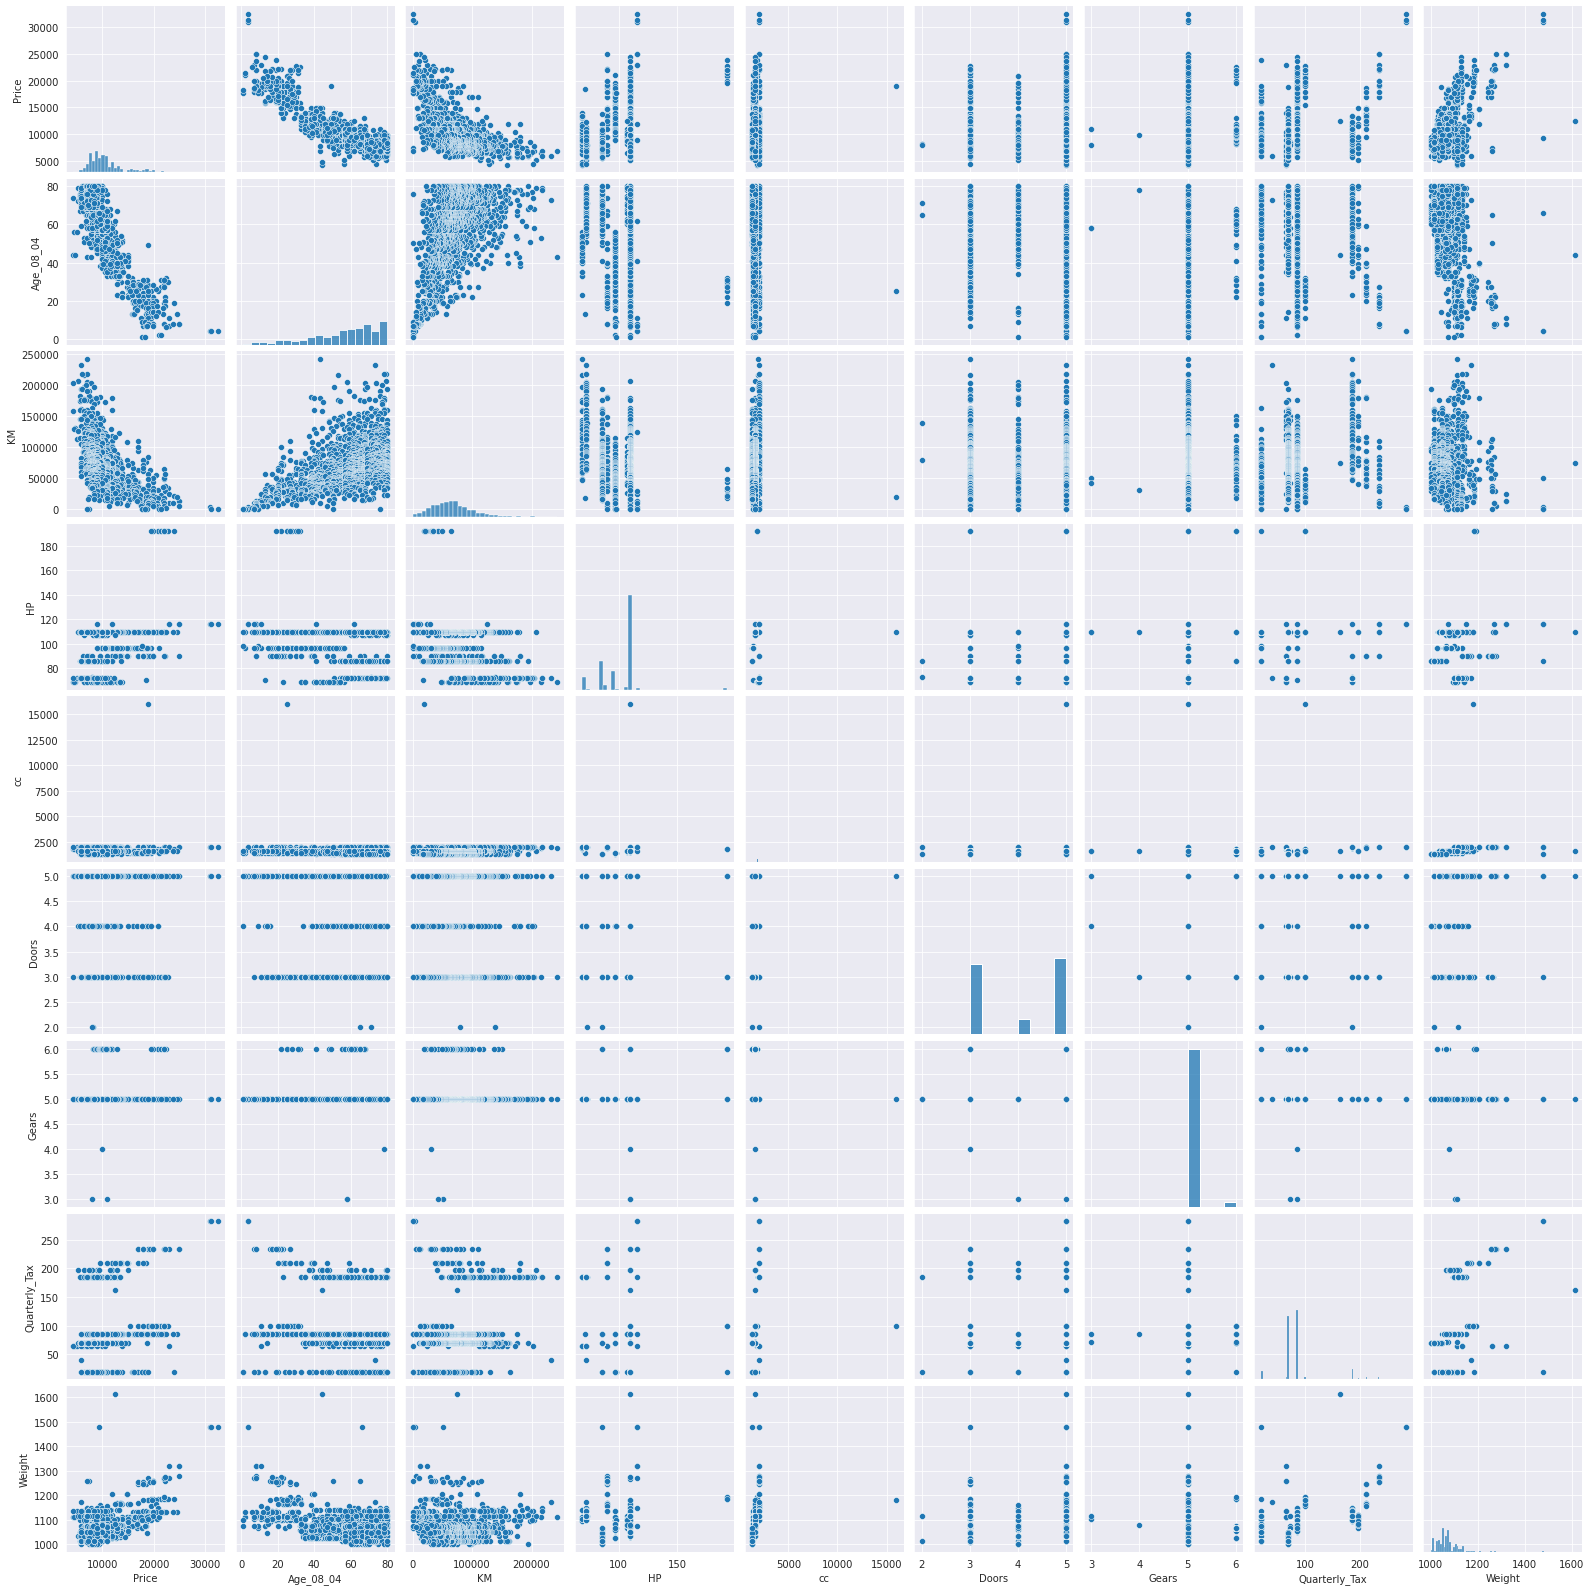

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(tyt1)

calculating VIF

In [24]:
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tyt1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tyt1).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=tyt1).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=tyt1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_dr=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt1).fit().rsquared
vif_dr=1/(1-rsq_dr)

rsq_gr=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=tyt1).fit().rsquared
vif_gr=1/(1-rsq_gr)

rsq_qt=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=tyt1).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_wt=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=tyt1).fit().rsquared
vif_wt=1/(1-rsq_wt)

#storing vif values in a data frame
d1={'variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_dr,vif_gr,vif_qt,vif_wt]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


subset selection

AIC

In [28]:
#build model with cc
model=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt1).fit()
f'AIC:{model.aic},rsq_cc:{rsq_cc}'

'AIC:24767.078283372837,rsq_cc:0.14081521776271877'

In [29]:
#build model with Doors
model=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=tyt1).fit()
f'AIC:{model.aic},rsq_dr:{rsq_dr}'

'AIC:24768.893819473007,rsq_dr:0.135378318779532'

In [ ]:
# cc is selected because AIC is smaller and r squr is greater

Residual Analysis

test for normality of residuals(Q-Q plot)

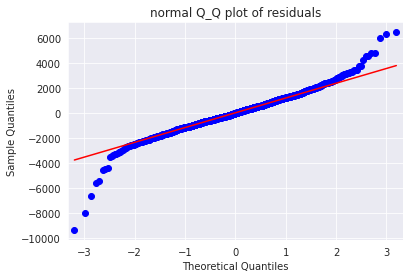

In [30]:
import statsmodels.api as sm

model=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt1).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title('normal Q_Q plot of residuals')
plt.show()

In [31]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

Residual plot for homoscedasticity

In [32]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

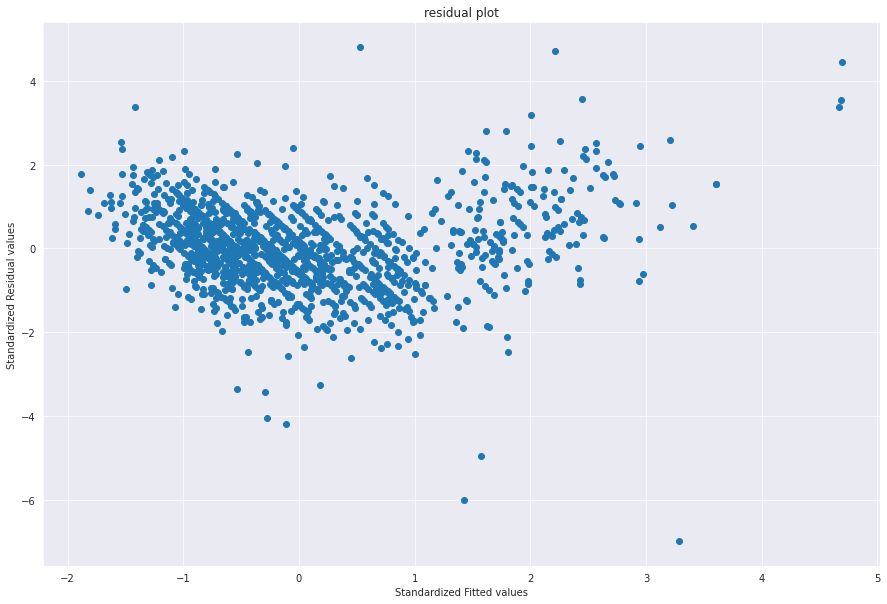

In [33]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')
plt.show()
#if there is no pattern in the graph then no problem

residual vs regressors

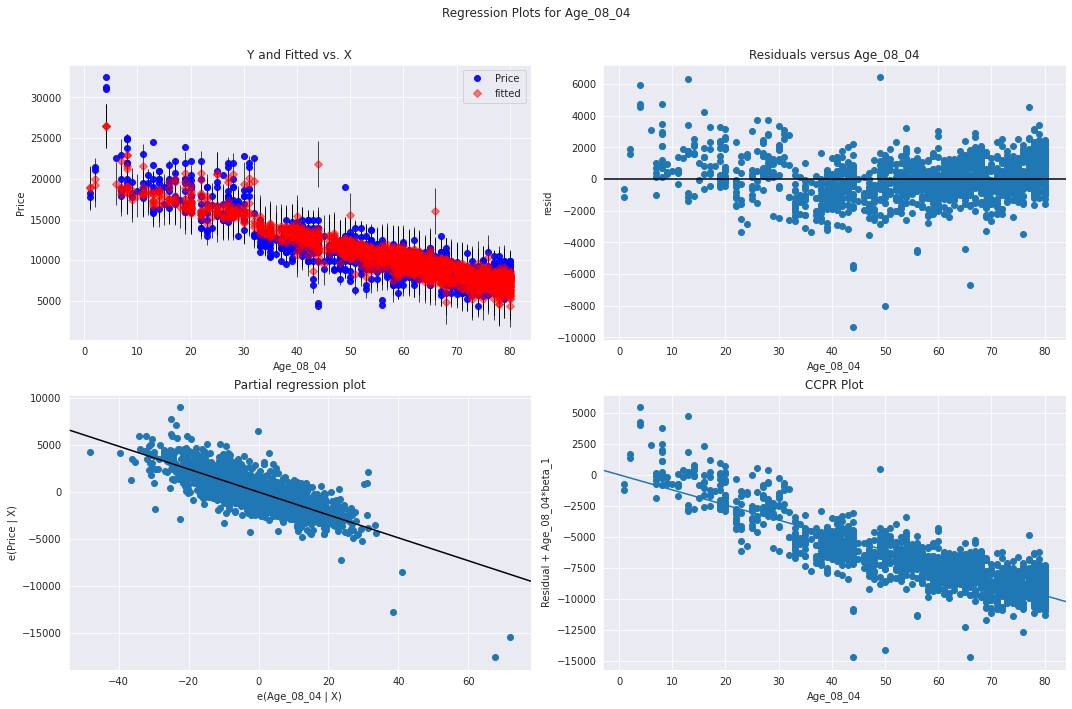

In [35]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tyt1).fit()
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)

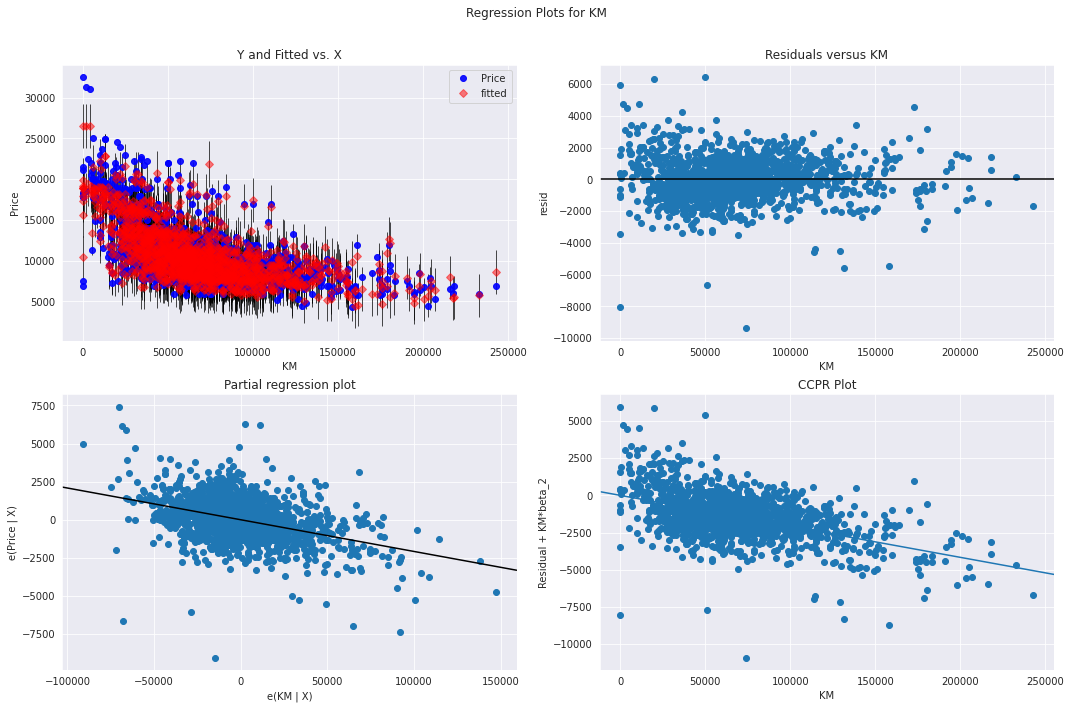

In [36]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)

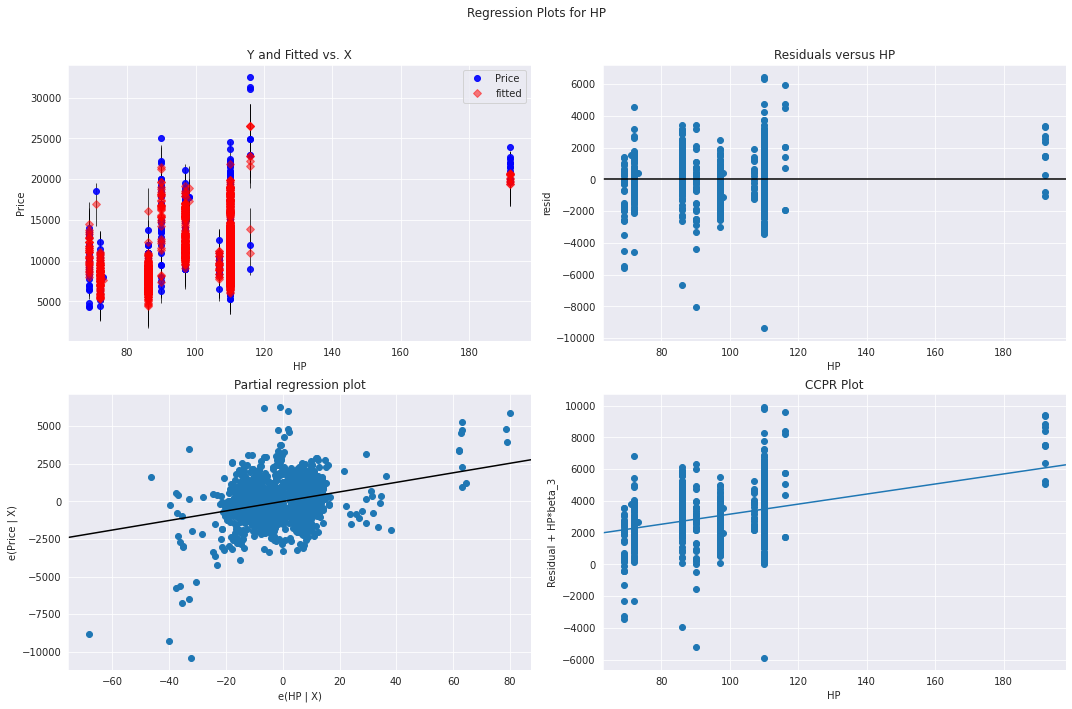

In [37]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)

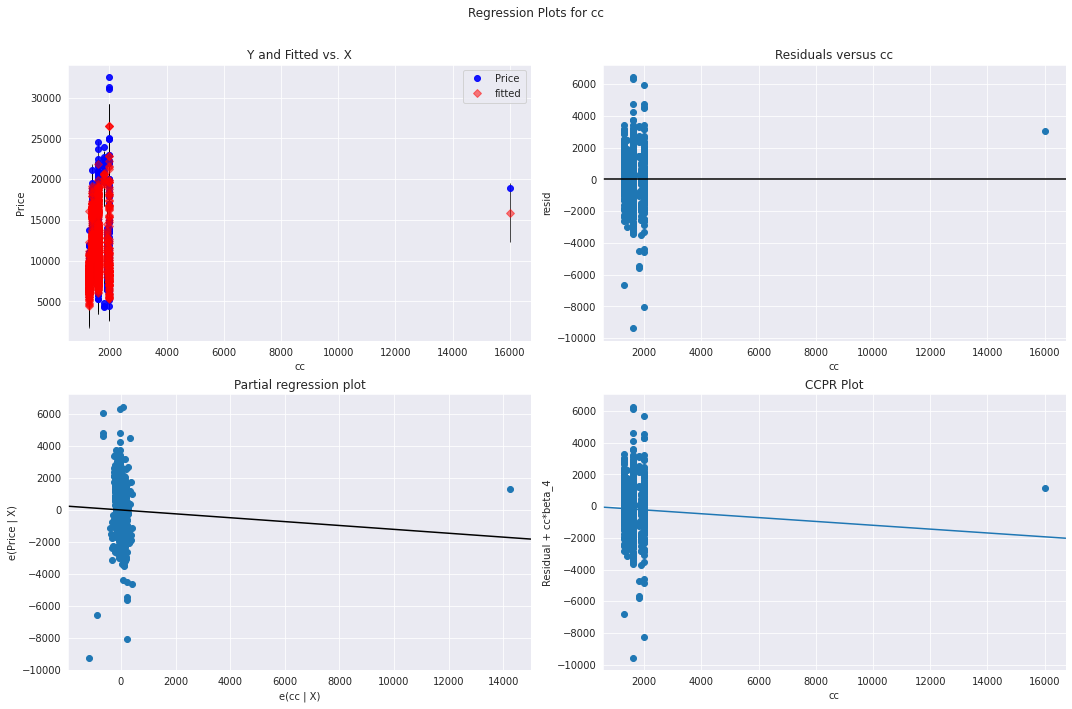

In [38]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)

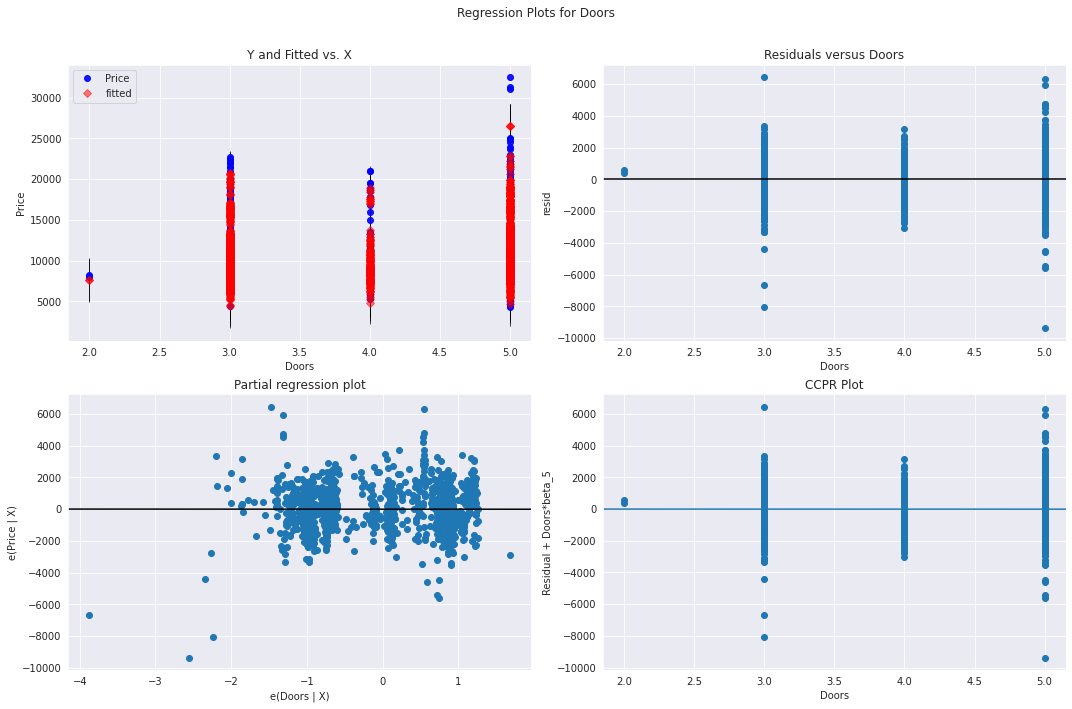

In [39]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)

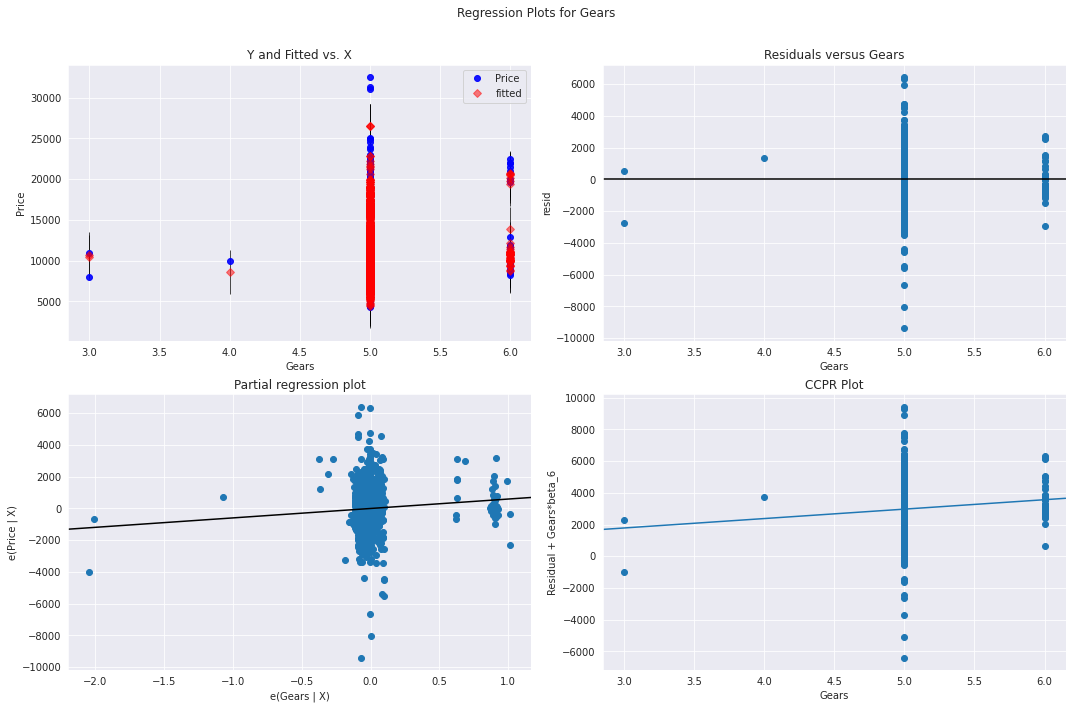

In [40]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)

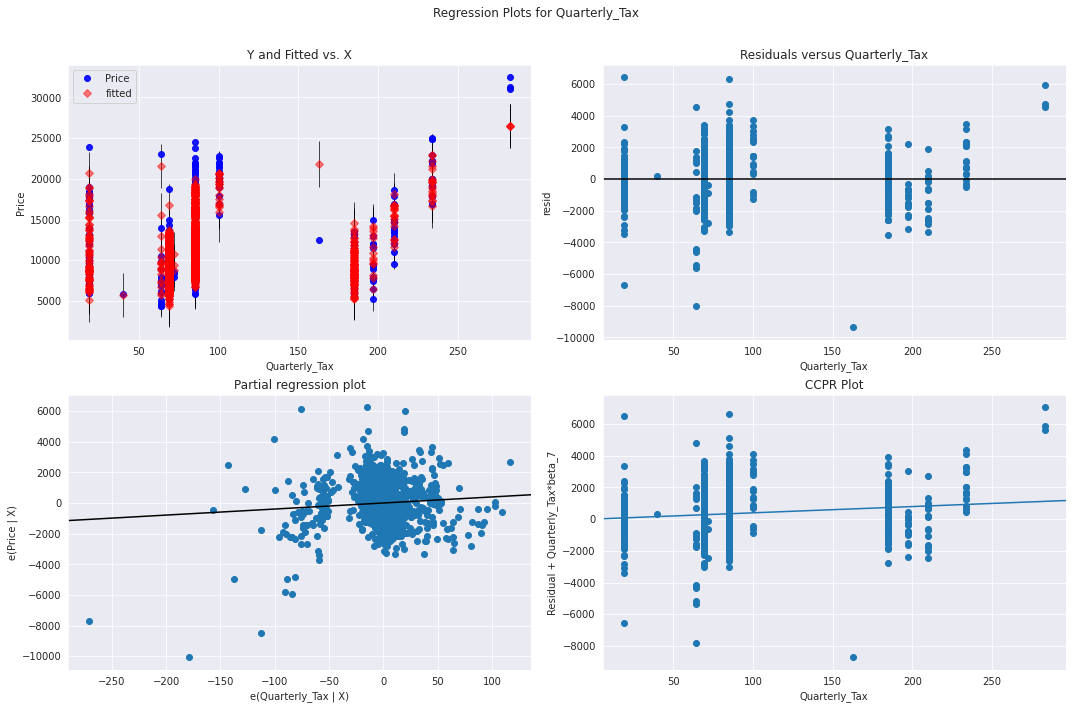

In [41]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)

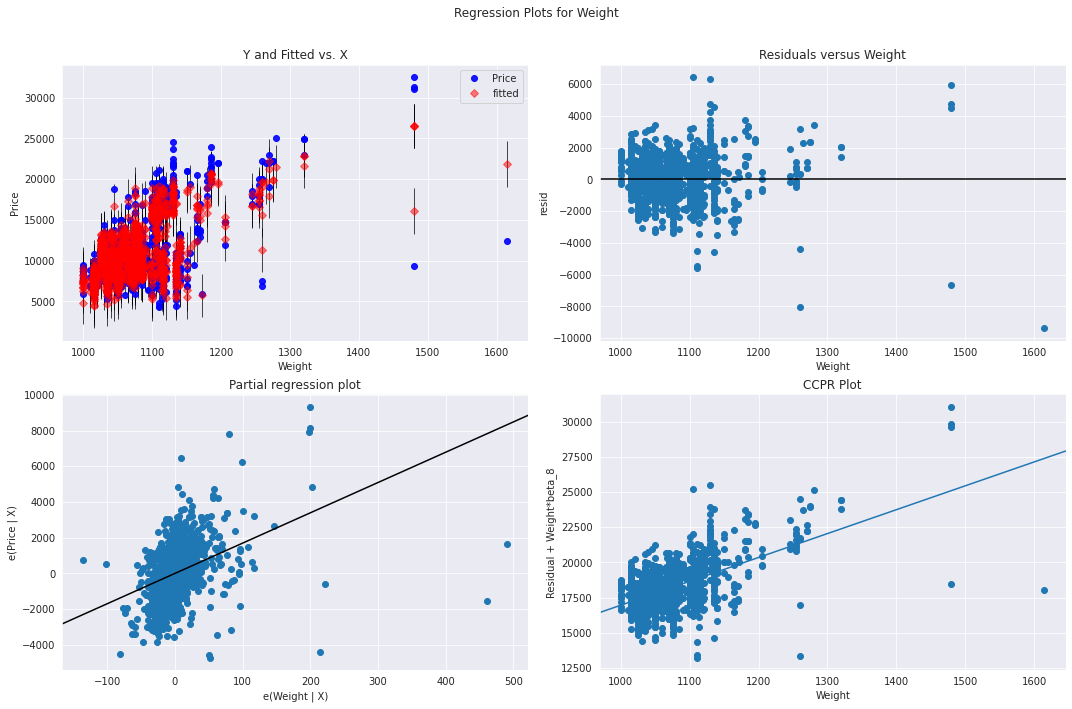

In [42]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)

Model Delection Diagnostics

detecting influencers/outliers

cook's distance

In [43]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<ipython-input-44-bf17c3e6911d>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tyt1)),np.round(c,3))


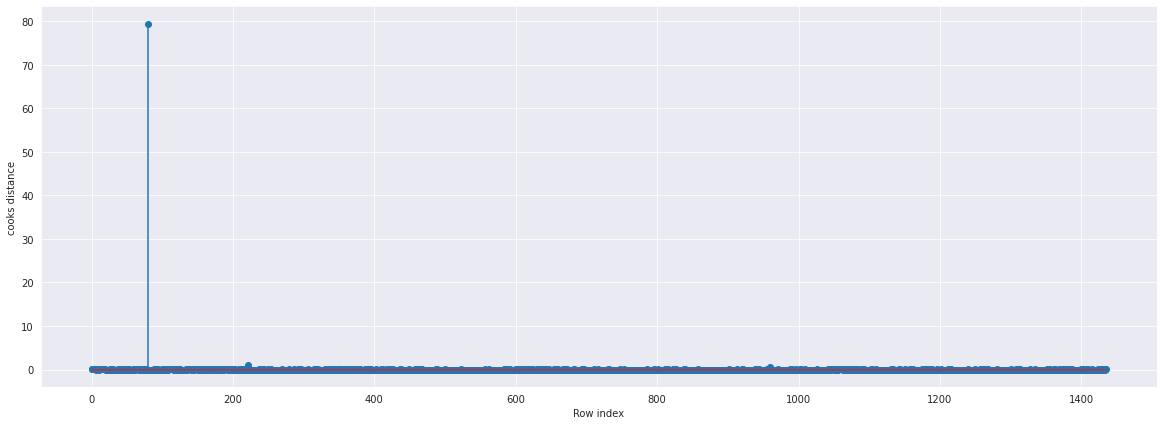

In [44]:
#plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tyt1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [45]:
(np.argmax(c),np.max(c))

(80, 79.52010624141955)

high influence points

In [46]:
tyt1.shape

(1436, 9)

In [47]:
k=tyt1.shape[1]
n=tyt1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020891364902506964

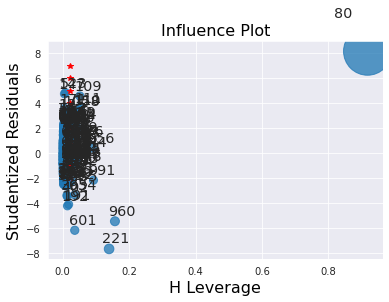

In [48]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model,alpha=0.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r*')

improving the model

In [49]:
#load the data
tyt1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


build model

In [51]:
# excluding cc and generate R square and AIC values
final_dr=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=tyt1).fit()

In [52]:
(final_dr.rsquared,final_dr.aic,final_dr.bic)

(0.8635902364277144, 24768.893819473007, 24811.050753469874)

In [53]:
# excluding Doors and generate R square and AIC values
final_cc=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt1).fit()

In [54]:
(final_cc.rsquared,final_cc.aic,final_cc.bic)

(0.8637625904386813, 24767.078283372837, 24809.235217369704)

comparing the R square values and AIC values cc is better than Doors

cook's distance

In [56]:
model_influence_cc=final_cc.get_influence()
(c_m,_)=model_influence_cc.cooks_distance

<ipython-input-57-570158eb0669>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tyt1)),np.round(c_m,3))


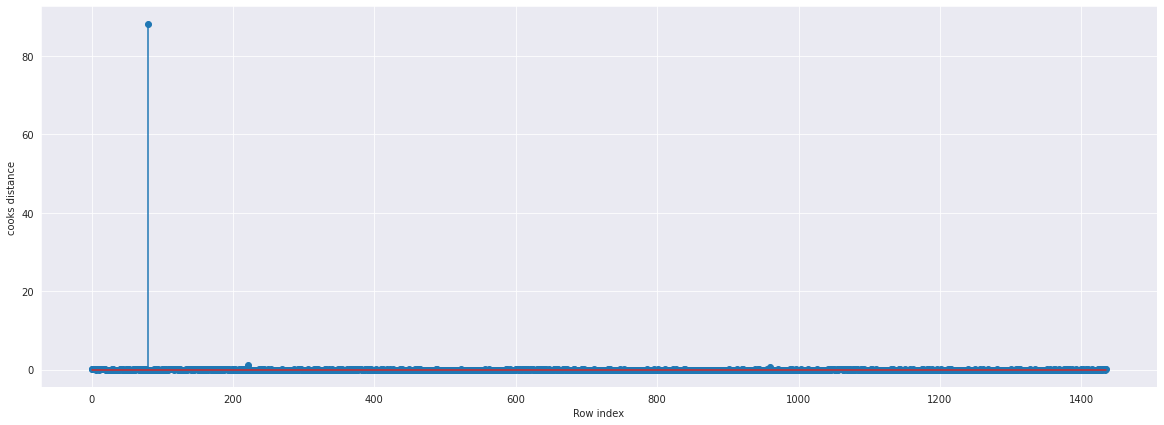

In [57]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tyt1)),np.round(c_m,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [58]:
(np.argmax(c_m),np.max(c_m))

(80, 88.25985710286837)

In [60]:
#drop 80 observation
tyt2=tyt1.drop(tyt1.index[80],axis=0)
tyt2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [61]:
#build the model on the new data
final_cc2=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt2).fit()

In [64]:
# check again for influencers
model_influence_cc=final_cc2.get_influence()
(c_cc,_)=model_influence_cc.cooks_distance

<ipython-input-65-4eb26fb3f49d>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tyt2)),np.round(c_cc,3))


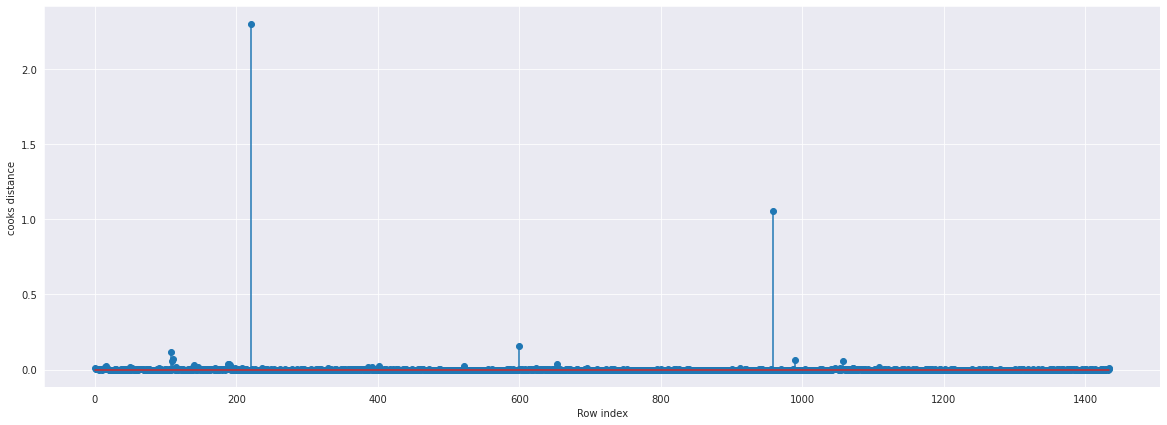

In [65]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tyt2)),np.round(c_cc,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [66]:
(np.argmax(c_cc),np.max(c_cc))

(220, 2.3034451664540874)

In [67]:
#drop 220 observation
tyt3=tyt2.drop(tyt2.index[220],axis=0)
tyt3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [68]:
#reset the index and re arrange the row values
tyt3=tyt3.reset_index()
tyt3.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [69]:
tyt3=tyt3.drop(['index'],axis=1)
tyt3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [70]:
#build the model on the new data
final_cc3=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt3).fit()

In [71]:
# check again for influencers
model_influence_cc=final_cc3.get_influence()
(c_cc,_)=model_influence_cc.cooks_distance

<ipython-input-72-898eab86a7e6>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tyt3)),np.round(c_cc,3))


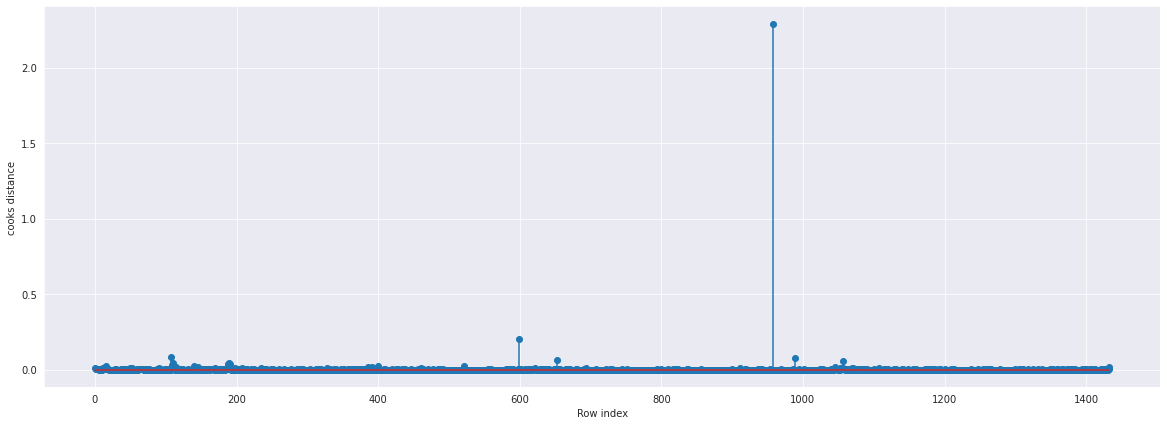

In [72]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tyt3)),np.round(c_cc,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [73]:
(np.argmax(c_cc),np.max(c_cc))

(958, 2.2907159163041926)

In [85]:
#drop 958 observation
tyt4=tyt3.drop(tyt3.index[958],axis=0)
tyt4.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [86]:
#reset the index and re arrange the row values
tyt4=tyt4.reset_index()

In [87]:
tyt4=tyt4.drop(['index'],axis=1)
tyt4.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [88]:
#build the model on the new data
final_cc4=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt4).fit()

In [89]:
# check again for influencers
model_influence_cc=final_cc4.get_influence()
(c_cc,_)=model_influence_cc.cooks_distance

<ipython-input-90-a0daa5a5dc0a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tyt4)),np.round(c_cc,3))


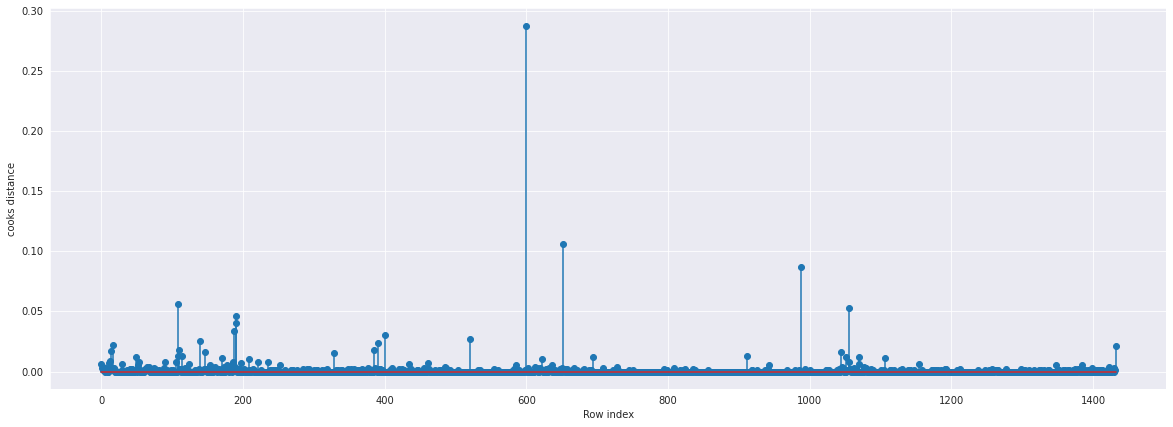

In [90]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tyt4)),np.round(c_cc,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [91]:
(np.argmax(c_cc),np.max(c_cc))

(599, 0.28772293638955526)

In [92]:
#drop 598,599,600 observation
tyt5=tyt4.drop(tyt4.index[[598,599,600]],axis=0)
#reset the index and re arrange the row values
tyt5=tyt5.reset_index()
tyt5=tyt5.drop(['index'],axis=1)
tyt5.head()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [93]:
#build the model on the new data
final_cc5=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt5).fit()

In [94]:
# check again for influencers
model_influence_cc=final_cc5.get_influence()
(c_cc,_)=model_influence_cc.cooks_distance

<ipython-input-95-cbc6de4f0f14>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tyt5)),np.round(c_cc,3))


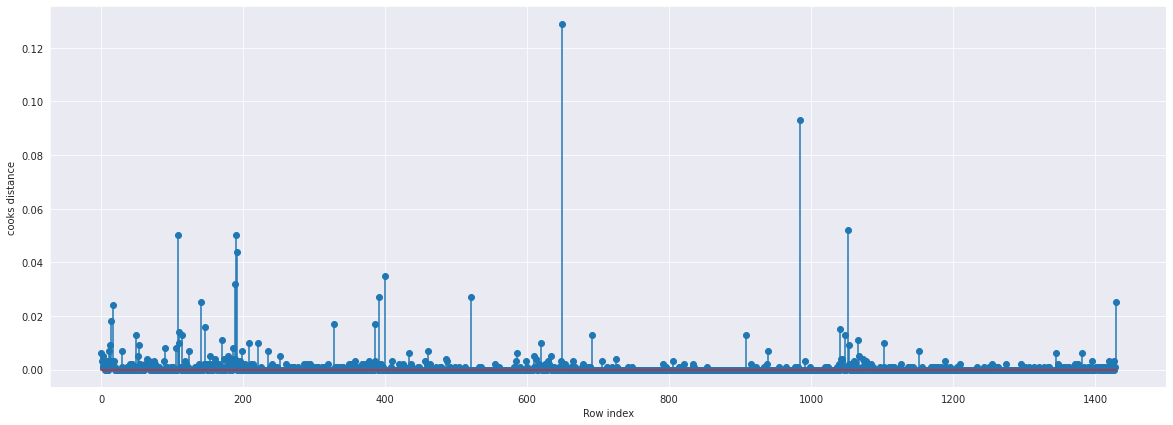

In [95]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tyt5)),np.round(c_cc,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [96]:
(np.argmax(c_cc),np.max(c_cc))

(649, 0.12920725175959694)

In [97]:
#drop 647,648,649,650,651,652 observations
tyt6=tyt5.drop(tyt5.index[[647,648,649,650,651,652]],axis=0)
#reset the index and re arrange the row values
tyt6=tyt6.reset_index()
tyt6=tyt6.drop(['index'],axis=1)
tyt6.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [98]:
#build the model on the new data
final_cc6=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt6).fit()

In [99]:
# check again for influencers
model_influence_cc=final_cc6.get_influence()
(c_cc,_)=model_influence_cc.cooks_distance

<ipython-input-100-efc5c8485954>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(tyt6)),np.round(c_cc,3))


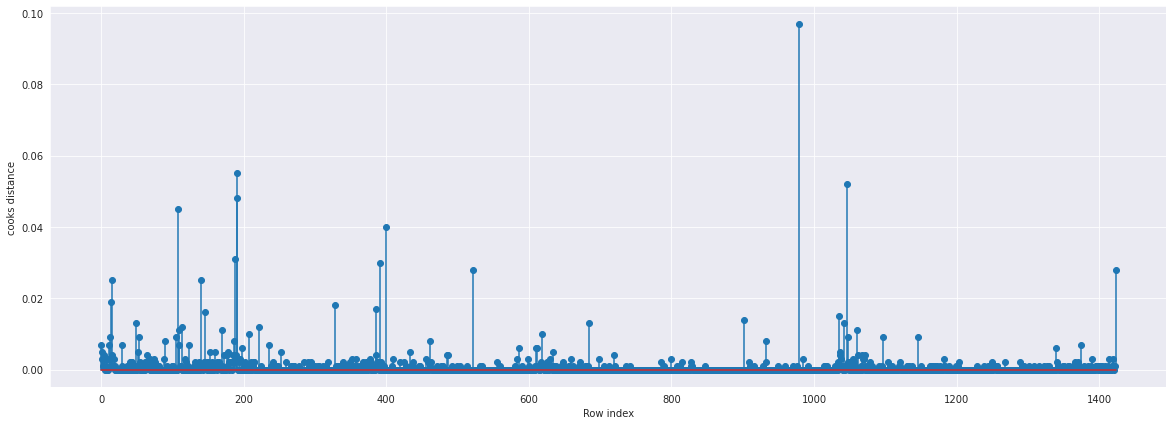

In [100]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tyt6)),np.round(c_cc,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [101]:
(np.argmax(c_cc),np.max(c_cc))

(979, 0.096781888269885)

In [102]:
#check accuracy of the model
final_cc6=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt6).fit()

In [103]:
(final_cc6.rsquared,final_cc6.aic)

(0.8907034880447308, 24249.684188298823)